Yeray Hernández Bethencourt

# Exploring data

| Feature               | Explanation                                                                                                       |
|-----------------------|-------------------------------------------------------------------------------------------------------------------|
| patiendid             | Patient Identification Number                                                                                      |
| age                   | Age of the patient                                                                                                |
| gender                | Gender of the patient - (0 => Female, 1 => Male)                                                                  |
| chestpain             | Chest pain type - (0 => typical angina, 1 => atypical angina, 2 => non-anginal pain, and 3 => asymptomatic)     |
| restingBP             | Resting Blood Pressure - (94-200 in mm HG)                                                                        |
| serumcholestrol       | Serum Cholesterol - (126-564 in mg/dl)                                                                            |
| fastingbloodsugar     | Fasting blood sugar - (0, 1 > 120 mg/dl) - (0 => false, 1 => true)                                                |
| restingelectro        | Resting electrocardiogram results - (Value 0: normal, Value 1: having ST-T wave abnormality, and Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria) |
| maxheartrate          | Maximum heart rate achieved - (71-202)                                                                             |
| exerciseangia         | Exercise induced angina - (0 => no, 1 => yes)                                                                     |
| oldpeak               | Oldpeak=ST - (0 - 6.2)                                                                                            |
| slope                 | Slope of the peak exercise ST segment - (1-upsloping, 2-flat, 3-downsloping)                                     |
| noofmajorvessels      | Number of major vessels - 0, 1, 2, 3                                                                              |
| target                | Classification - (0 => absence of heart disease, 1 => presence of heart disease)                                 |


## Imports and Load data

In [63]:
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn.discriminant_analysis import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt 
import seaborn as sns

import numpy as np
from skimpy import skim

import warnings
warnings.filterwarnings('ignore')
ran_st = 30 # random state for reproducibility

In [34]:
df_cardiovascular = pd.read_csv('Cardiovascular_Disease_Dataset.csv')


## Showing data

In [35]:
df_cardiovascular.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1


In [36]:
df_cardiovascular.shape

(1000, 14)

In [37]:
df_cardiovascular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [38]:
# Identify null data
df_cardiovascular.isnull().sum()


patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

We can see that the dataFrame its already clean without null data. We are not going to clean it.

In [39]:
# dropping unuseful column

df_cardiovascular.drop('patientid', axis=1, inplace=True)


Lets show some matrix for learning about the dataframe

In [40]:
# Summary descriptive statistics for all numeric columns
df_cardiovascular.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,49.2420,17.864730,20.0,34.00,49.0,64.25,80.0
gender,1000.0,0.7650,0.424211,0.0,1.00,1.0,1.00,1.0
chestpain,1000.0,0.9800,0.953157,0.0,0.00,1.0,2.00,3.0
restingBP,1000.0,151.7470,29.965228,94.0,129.00,147.0,181.00,200.0
serumcholestrol,1000.0,311.4470,132.443801,0.0,235.75,318.0,404.25,602.0
fastingbloodsugar,1000.0,0.2960,0.456719,0.0,0.00,0.0,1.00,1.0
restingrelectro,1000.0,0.7480,0.770123,0.0,0.00,1.0,1.00,2.0
maxheartrate,1000.0,145.4770,34.190268,71.0,119.75,146.0,175.00,202.0
exerciseangia,1000.0,0.4980,0.500246,0.0,0.00,0.0,1.00,1.0
oldpeak,1000.0,2.7077,1.720753,0.0,1.30,2.4,4.10,6.2


In [41]:
skim(df_cardiovascular)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1000   │ │ int32       │ 12    │                                                          │
│ │ Number of columns │ 13     │ │ float64     │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name              ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0   ┃ p25   ┃ p50   ┃ p75  ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ age                      │    0 │      0 │     49 │     18 │   20 │    34 │    49 │   64 │    80 │ ▇▇▇▇▇▇  │  │
│ │ gender                   │    0 │      0 │   0.77 │   0.42 │    0 │     1 │     1 │    1 │     1 │ ▂    ▇  │  │
│ │ chestpain                │    0 │      0 │   0.98 │   0.95 │    0 │     0 │     1 │    2 │     3 │ ▇ ▅ ▆▁  │  │
│ │ restingBP                │    0 │      0 │    150 │     30 │   94 │   130 │   150 │  180 │   200 │ ▃▅▇▅▅▇  │  │
│ │ serumcholestrol          │    0 │      0 │    310 │    130 │    0 │   240 │   320 │  400 │   600 │ ▂▃▇▇▅▂  │  │
│ │ fastingbloodsugar        │    0 │      0 │    0.3 │   0.46 │    0 │     0 │     0 │    1 │     1 │ ▇    ▃  │  │
│ │ restingrelectro          │    0 │      0 │   0.75 │   0.77 │    0 │     0 │     1 │    1 │     2 │ ▇  ▆ ▃  │  │
│ │ maxheartrate             │    0 │      0 │    150 │     34 │   71 │   120 │   150 │  180 │   200 │ ▃▅▇▇▇▇  │  │
│ │ exerciseangia            │    0 │      0 │    0.5 │    0.5 │    0 │     0 │     0 │    1 │     1 │ ▇    ▇  │  │
│ │ oldpeak                  │    0 │      0 │    2.7 │    1.7 │    0 │   1.3 │   2.4 │  4.1 │   6.2 │ ▇▇▇▆▅▅  │  │
│ │ slope                    │    0 │      0 │    1.5 │      1 │    0 │     1 │     2 │    2 │     3 │ ▅ ▇ ▇▅  │  │
│ │ noofmajorvessels         │    0 │      0 │    1.2 │   0.98 │    0 │     0 │     1 │    2 │     3 │ ▆ ▇ ▆▃  │  │
│ │ target                   │    0 │      0 │   0.58 │   0.49 │    0 │     0 │     1 │    1 │     1 │ ▆    ▇  │  │
│ └──────────────────────────┴──────┴────────┴────────┴────────┴──────┴───────┴───────┴──────┴───────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [42]:
# Age range of the patients and number of males and females  in the datast
print(f"The patients age range is {df_cardiovascular['age'].min()} to {df_cardiovascular['age'].max()} years.")
# 0 - Female 
# 1 - Male
df_cardiovascular.gender.value_counts()

The patients age range is 20 to 80 years.


gender
1    765
0    235
Name: count, dtype: int64

In [43]:
# Patients average blood pressure at rest
print(f"Average Blood Pressure at Rest: {df_cardiovascular['restingBP'].mean()} mm HG")

Average Blood Pressure at Rest: 151.747 mm HG


In [44]:
# Age and maximal heart rate correlation
print(f"Age and Maximum Heart Rate Correlation: {df_cardiovascular['age'].corr(df_cardiovascular['maxheartrate']):.2f}")

Age and Maximum Heart Rate Correlation: -0.04


The result -0.04 indicates a very weak correlation between age and maximum heart rate in the DataFrame. The negative correlation suggests that, on average, as age increases, maximum heart rate tends to slightly decrease, but the magnitude of this relationship is very low, indicating there's no strong relationship between these two variables.

In [45]:
# Information on the Individual Having the Lowest and Highest Resting Blood Pressure
print('---LOWEST Resting Blood Pressure--- \n',df_cardiovascular.loc[df_cardiovascular['restingBP'].idxmin()])
print()
print('---HIGHEST Resting Blood Pressure--- \n',df_cardiovascular.loc[df_cardiovascular['restingBP'].idxmax()])

---LOWEST Resting Blood Pressure--- 
 age                   40.0
gender                 1.0
chestpain              0.0
restingBP             94.0
serumcholestrol      229.0
fastingbloodsugar      0.0
restingrelectro        1.0
maxheartrate         115.0
exerciseangia          0.0
oldpeak                3.7
slope                  1.0
noofmajorvessels       1.0
target                 0.0
Name: 1, dtype: float64

---HIGHEST Resting Blood Pressure--- 
 age                   65.0
gender                 1.0
chestpain              0.0
restingBP            200.0
serumcholestrol      247.0
fastingbloodsugar      1.0
restingrelectro        1.0
maxheartrate         194.0
exerciseangia          1.0
oldpeak                3.7
slope                  1.0
noofmajorvessels       1.0
target                 0.0
Name: 17, dtype: float64


# Visualization

## Numbers and ratios of Categorical Variables

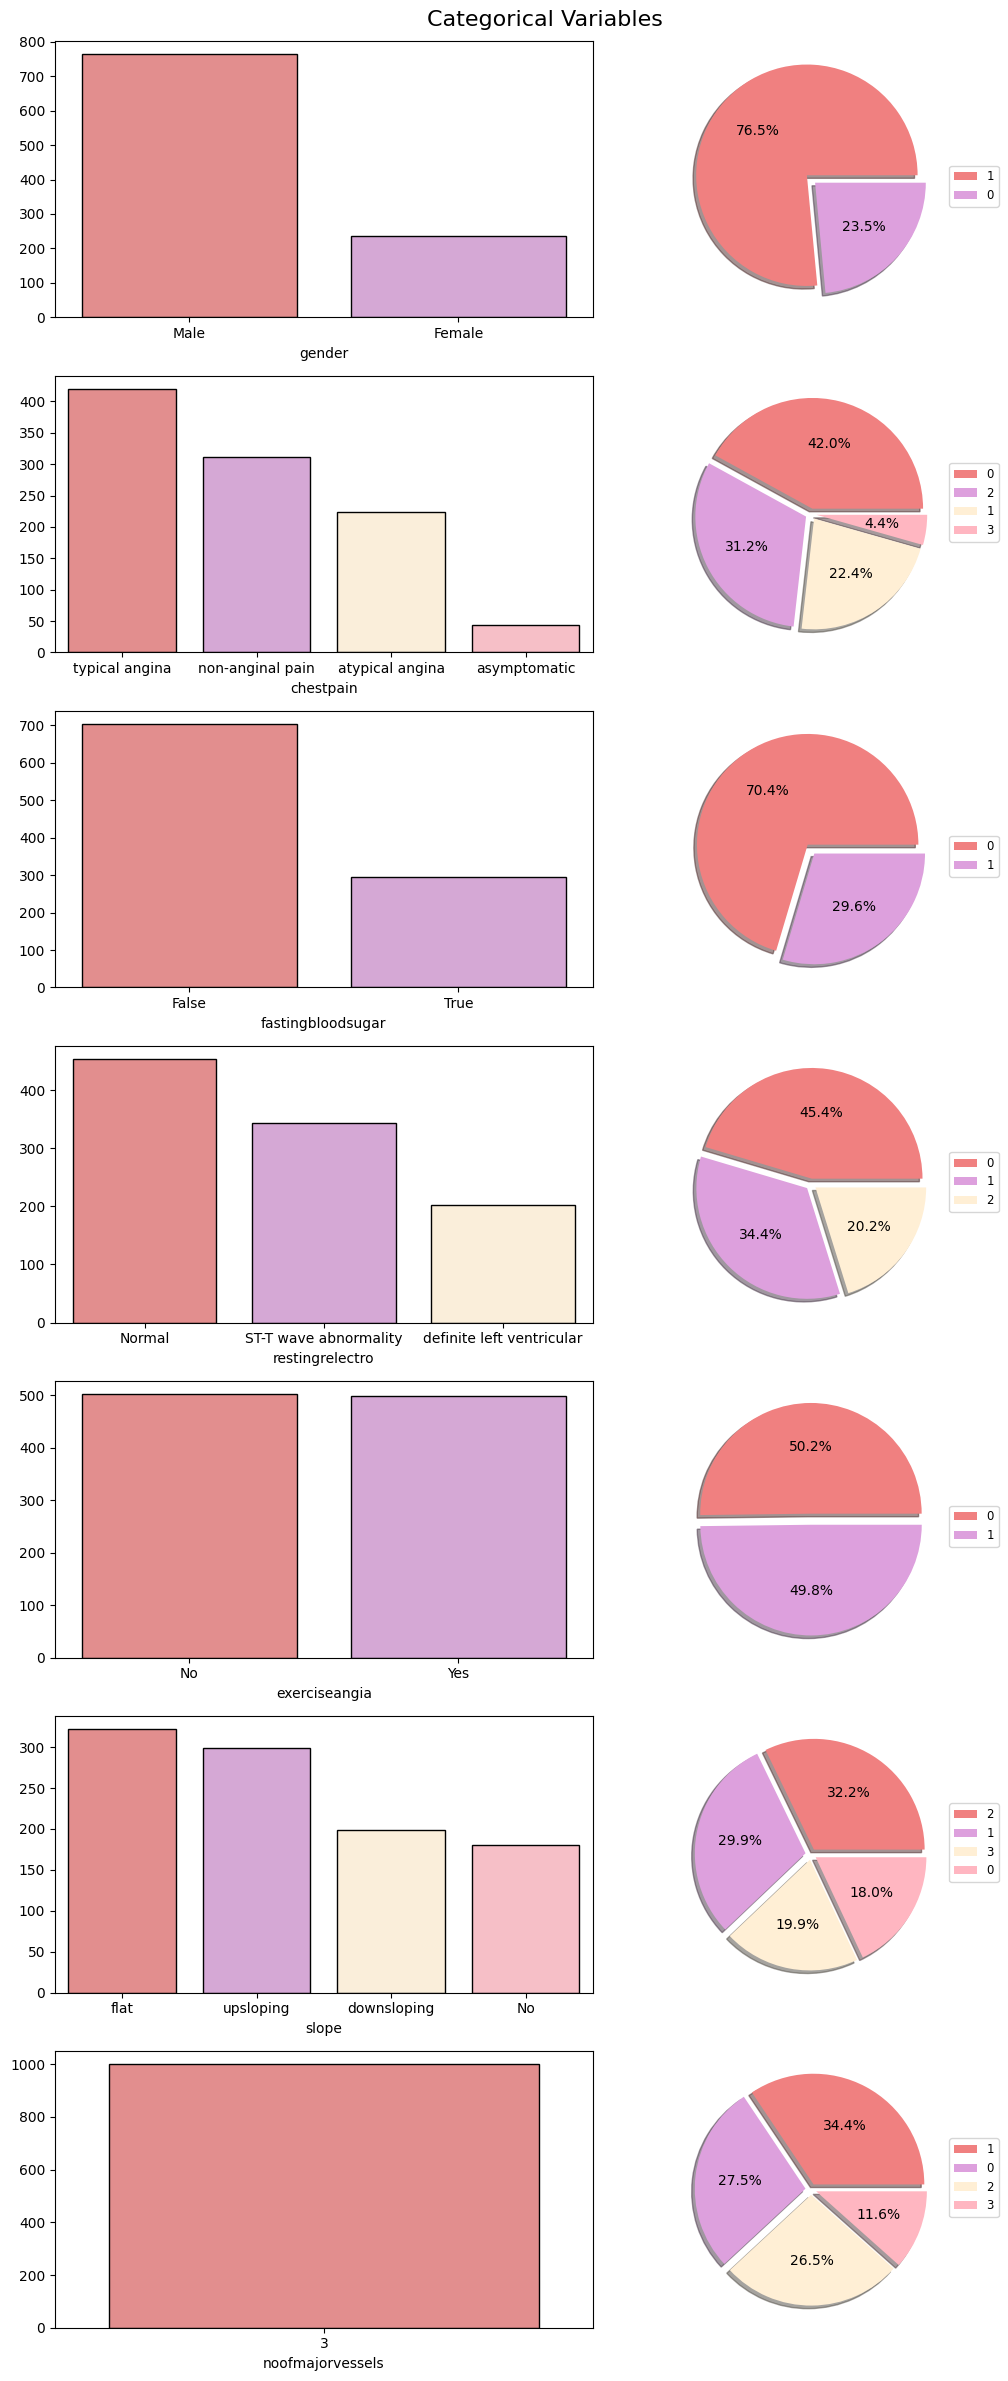

In [46]:
# Counts and Ratios of Categorical Variables
cat_vars = ['gender', 'chestpain', 'fastingbloodsugar', 'restingrelectro', 'exerciseangia', 'slope', 'noofmajorvessels']
cat_labels = {
              'gender':{0:'Female',1:'Male'}, 
              'chestpain':{0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'},
              'fastingbloodsugar':{0:'False',1:'True'},
              'restingrelectro':{0:'Normal',1:'ST-T wave abnormality',2:'definite left ventricular'},
              'exerciseangia':{0:'No',1:'Yes'},
              'slope':{0:'No',1:'upsloping',2:'flat',3:'downsloping'},
              'noofmajorvessels':[0,1,2,3]
              }
custom_colors = ['lightcoral', 'plum', 'papayawhip', 'lightpink']
plt.figure(figsize=(11,24))
plt.suptitle('Categorical Variables', fontsize=16, y=0.99)  
j = 1
for i in cat_vars:
    if i in cat_labels:
        label_col = df_cardiovascular[i].replace(cat_labels[i])
    else:
        label_col = df_cardiovascular[i]
    plt.subplot(7,2, j)
    sns.barplot(x=label_col.value_counts().index, 
                y=label_col.value_counts(), 
                palette=custom_colors,
                edgecolor='black')
    plt.ylabel("")
    plt.subplot(7,2, j+1)
    plt.pie(df_cardiovascular[i].value_counts(), 
            explode=0.05 * np.ones(len(df_cardiovascular[i].value_counts())), 
            shadow=True, 
            autopct='%0.1f%%', 
            colors=custom_colors)
    j = j +2
    plt.legend(labels=df_cardiovascular[i].value_counts().index, loc=(1,0.4), fontsize="small")
plt.tight_layout()
plt.show()


## Numbers and ratios of Numerical Variables

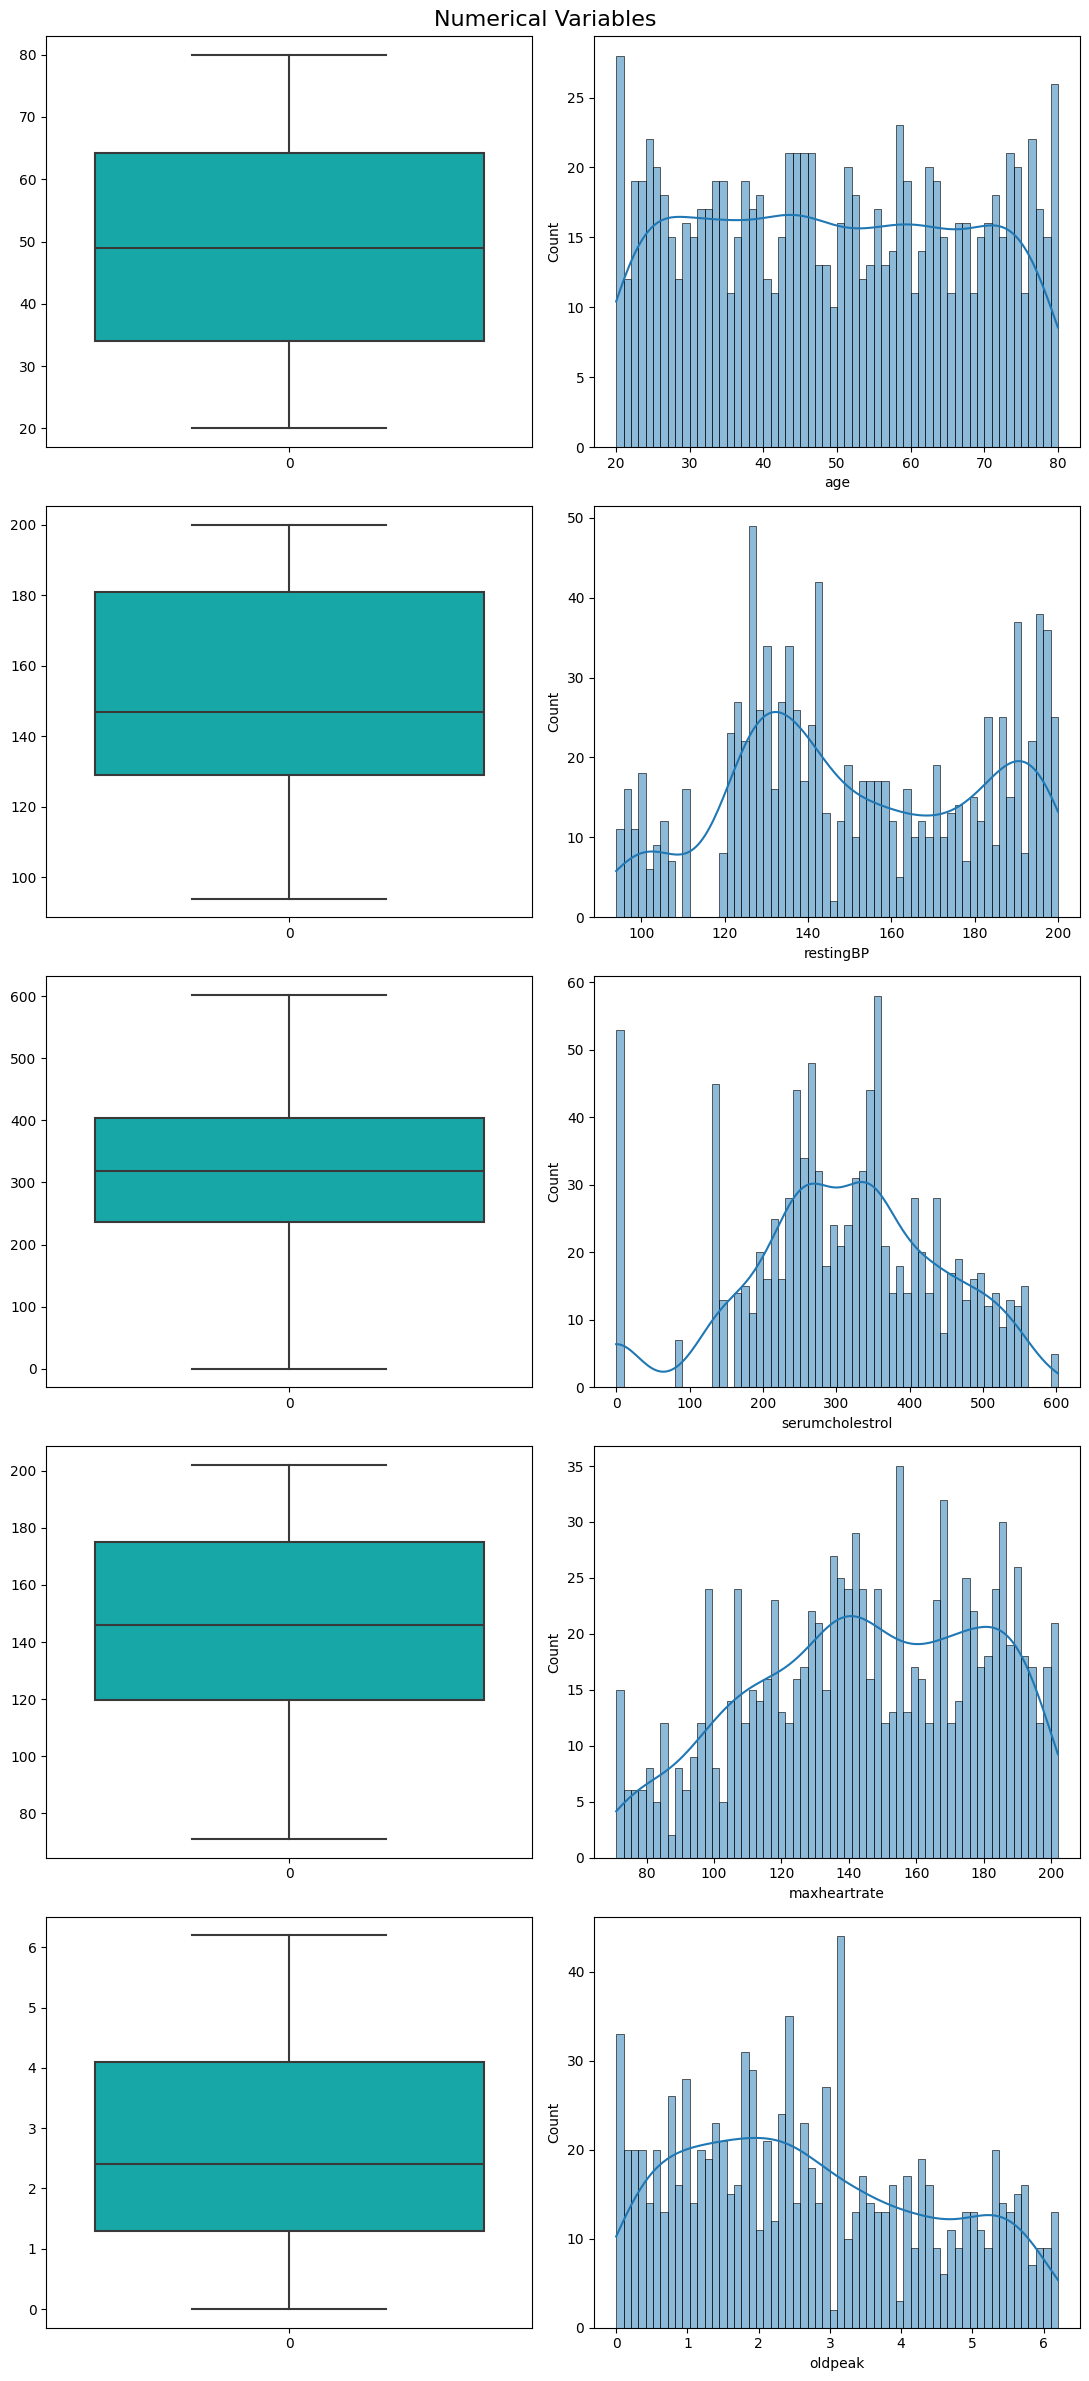

In [47]:
num_list = ['age', 'restingBP', 'serumcholestrol', 'maxheartrate', 'oldpeak']
plt.figure(figsize=(11,24))
plt.suptitle('Numerical Variables', fontsize=16, y=0.99)  
j = 1
for i in num_list:
    plt.subplot(5,2, j)
    sns.boxplot(df_cardiovascular[i], color="c")
    plt.subplot(5,2, j+1)
    sns.histplot(df_cardiovascular[i], bins=60, kde=True)
    j = j +2
    #x  plt.suptitle("Distributions of numerical variables\n", fontsize=15)
plt.tight_layout()
plt.show()

## Target Variable and Chest Pain

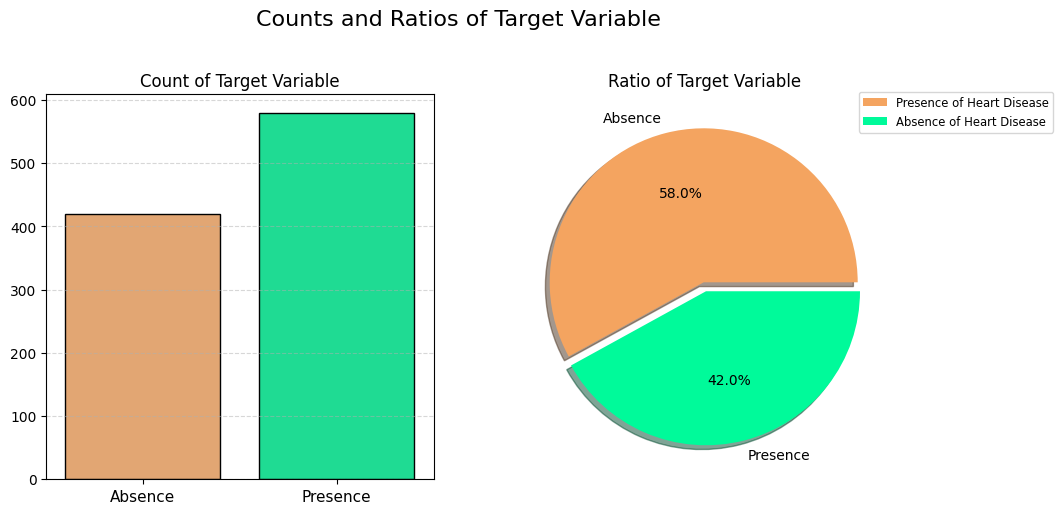

In [48]:
# Counts and ratios of target variable
plt.figure(figsize=(11, 5))
plt.subplot(1,2,1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.barplot(x=df_cardiovascular['target'].value_counts().index, 
            y=df_cardiovascular['target'].value_counts(), 
            palette=['sandybrown', 'mediumspringgreen'],
            edgecolor='black')
plt.xticks([0, 1], ["Absence", "Presence"], fontsize=11)
plt.title("Count of Target Variable", fontsize=12)
plt.xlabel("")
plt.ylabel("")

plt.subplot(1,2,2)
plt.pie(x=df_cardiovascular['target'].value_counts(), 
        labels=['Absence', 'Presence'], 
        explode=[0.03,0.03], 
        autopct="%0.1f%%", 
        shadow=True, 
        colors=['sandybrown', 'mediumspringgreen'])
plt.title("Ratio of Target Variable", fontsize=12)
plt.legend(labels=["Presence of Heart Disease", "Absence of Heart Disease"], 
           loc=(0.9,0.9), fontsize="small")

plt.suptitle("Counts and Ratios of Target Variable", fontsize=16, y=1.05)
plt.show()

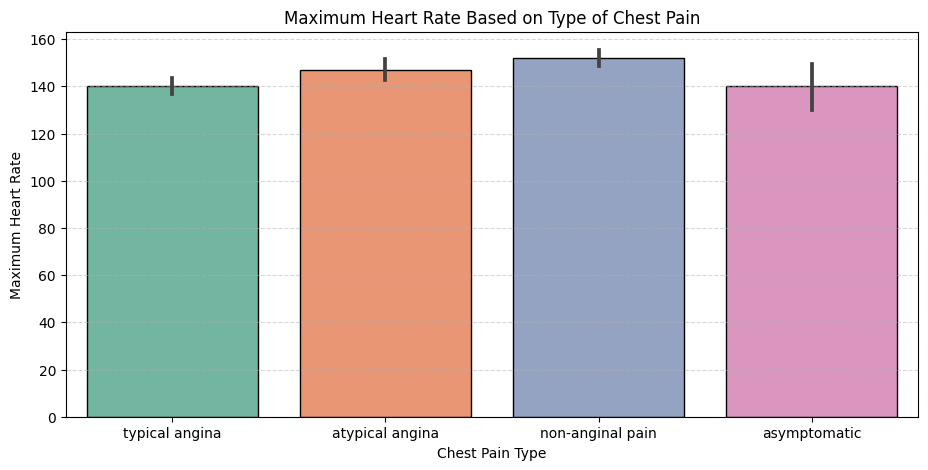

In [49]:
# Maximum heart rate based on type of chest pain 
plt.figure(figsize=(11, 5))
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.barplot(x='chestpain', 
            y='maxheartrate', 
            data=df_cardiovascular, 
            palette='Set2', 
            edgecolor='black')
plt.title('Maximum Heart Rate Based on Type of Chest Pain')
plt.xticks([0,1,2,3], ['typical angina','atypical angina','non-anginal pain','asymptomatic'])
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate')
plt.show()

## Distributions

Here we are going to show some importants distribution that can show as important information.

Observing if there is any relationship between blood pressure at rest and the age of the patients, differentiating between those with and without cardiovascular diseases.


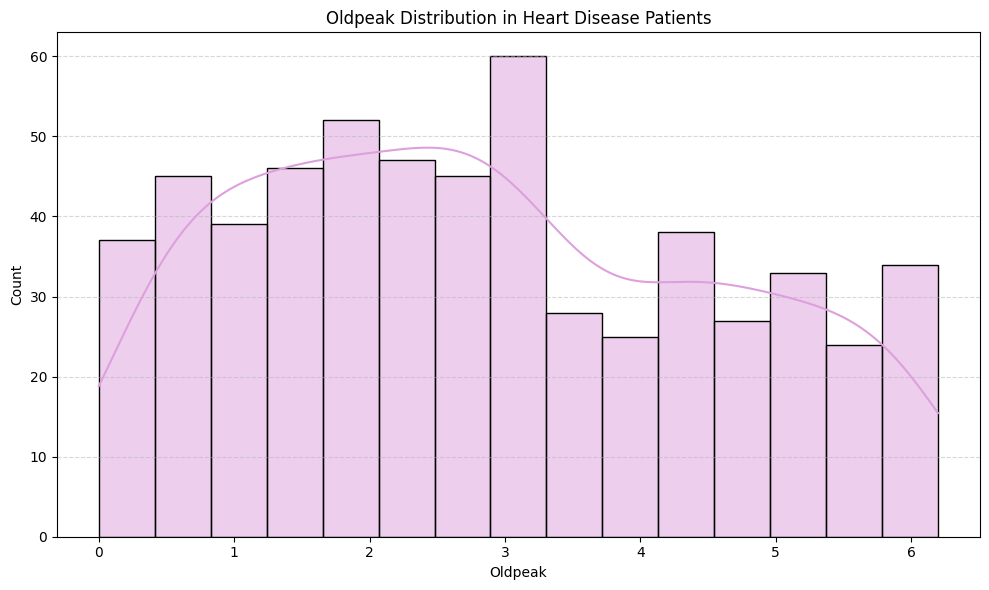

In [50]:
# Oldpeak distribution in heart disease patients
plt.figure(figsize=(10, 6))
plt.grid(axis='y', linestyle='--', alpha=0.5)
sns.histplot(x='oldpeak', data=df_cardiovascular[df_cardiovascular['target'] == 1], bins=15, kde=True, color='plum')
plt.title('Oldpeak Distribution in Heart Disease Patients')
plt.xlabel('Oldpeak')
plt.tight_layout()
plt.show()

Distribution of the maximum heart rate achieved in the dataset, which may be useful to better understand this variable and its relationship with cardiovascular diseases.

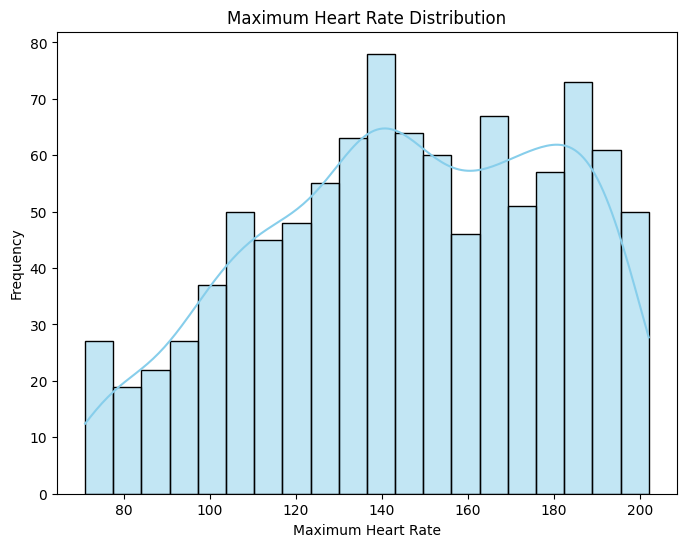

In [51]:
plt.figure(figsize=(8, 6))
sns.histplot(df_cardiovascular['maxheartrate'], bins=20, kde=True, color='skyblue')
plt.title('Maximum Heart Rate Distribution')
plt.xlabel('Maximum Heart Rate')
plt.ylabel('Frequency')
plt.show()

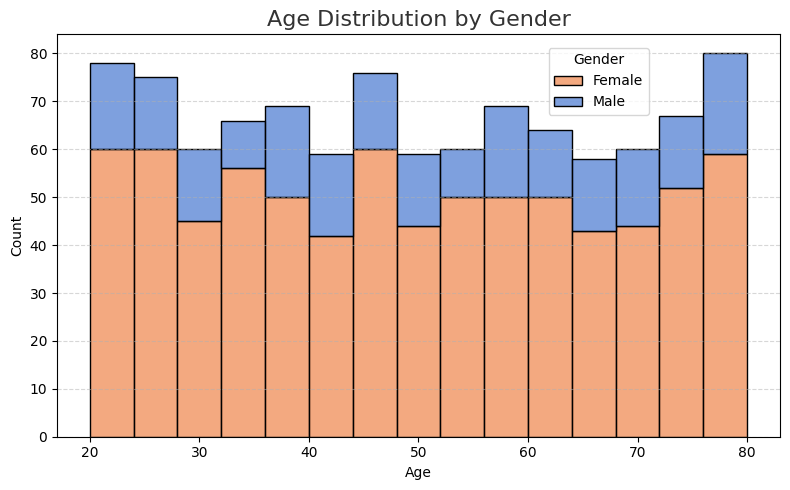

In [52]:
# Age distribution by gender
plt.figure(figsize=(8, 5))
sns.histplot(x='age', hue='gender', data=df_cardiovascular, palette='muted', multiple='stack', bins=15, alpha=0.7)
plt.title('Age Distribution by Gender', fontsize=16, alpha=0.8)
plt.xlabel('Age')
plt.legend(title='Gender', labels=['Female', 'Male'], loc=(0.68,0.8))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Correlation 

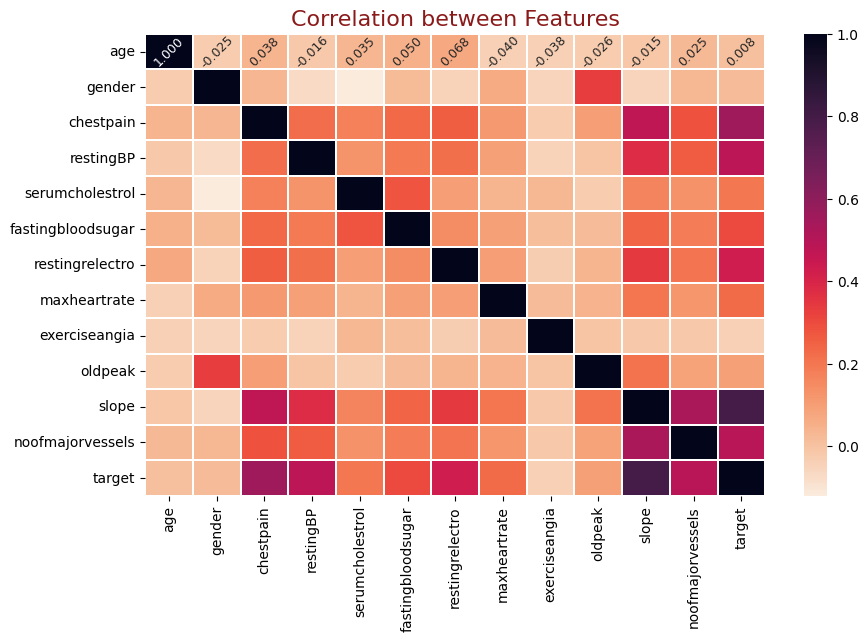

In [53]:
# Correaltion table
plt.figure(figsize=(10,6))
sns.heatmap(
            df_cardiovascular.corr(),
            linewidths=0.05,
            annot=True,
            annot_kws={"size": 9, "rotation": 45},
            fmt=".3f",
            cmap="rocket_r",
)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.title("Correlation between Features", fontsize=16, color="#8b1a1a")
plt.show()

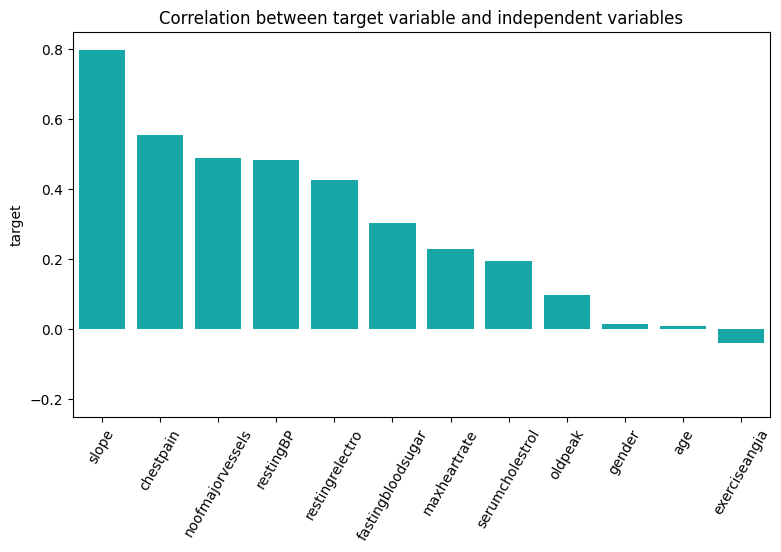

In [54]:
# Correlation between target variable and independent variables
corr_features = df_cardiovascular.corr()["target"].sort_values(ascending=False)[1:]

plt.figure(figsize=(9,5))
sns.barplot(x=corr_features.index, y=corr_features, color="c")
plt.ylim(-0.25, 0.85), plt.xticks(rotation=60)
plt.title("Correlation between target variable and independent variables")
plt.show()

# Split (train/test)

In [55]:
y = df_cardiovascular["target"]
X = df_cardiovascular.drop(["target"], axis=1)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=ran_st)

In [56]:
# Features of train set
X_train.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
802,56,1,0,133,268,1,0,79,0,5.3,1,1
434,45,1,0,100,269,0,1,73,0,5.3,1,0
900,74,0,0,141,436,0,1,145,1,0.4,1,2
137,46,1,2,177,537,1,1,147,0,4.5,2,1
413,53,1,1,101,354,0,1,131,0,5.1,0,0


In [57]:
# Dependent or target variable
y.head()

0    1
1    0
2    0
3    1
4    1
Name: target, dtype: int64

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
# Features of train set
X_train.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
541,71,1,2,186,544,1,1,150,1,4.3,3,3
440,70,1,1,196,404,1,0,130,1,1.2,3,1
482,77,1,0,110,254,0,0,186,0,2.0,1,1
422,36,1,1,132,307,0,0,175,0,5.3,0,0
778,76,1,2,135,325,0,0,120,0,2.3,0,0


In [60]:
# Features of test set
X_test.head()

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
521,44,1,0,147,487,0,1,179,0,3.1,2,1
737,29,1,0,152,138,0,0,199,1,0.0,0,0
740,72,0,1,156,411,0,0,186,0,0.1,1,2
660,67,1,0,165,234,0,0,168,1,5.6,1,1
411,64,0,2,97,0,0,1,186,1,1.8,3,1


# Comparing Models

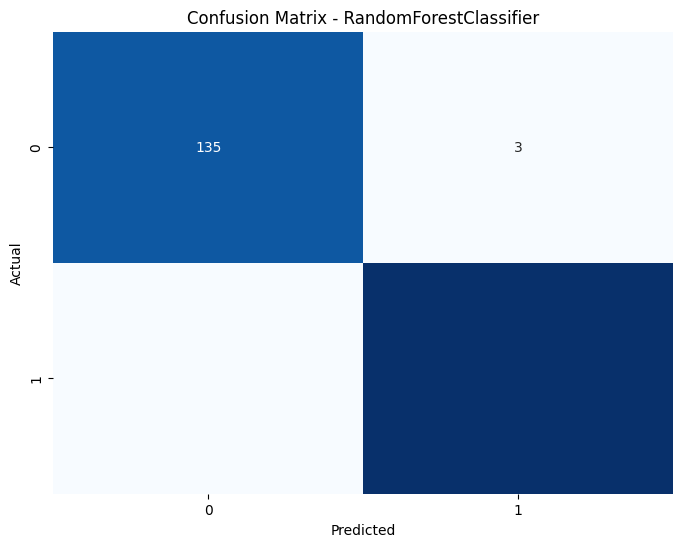

RandomForestClassifier:
Accuracy = 0.98
Precision = 0.98
Recall = 0.98



<Figure size 640x480 with 0 Axes>

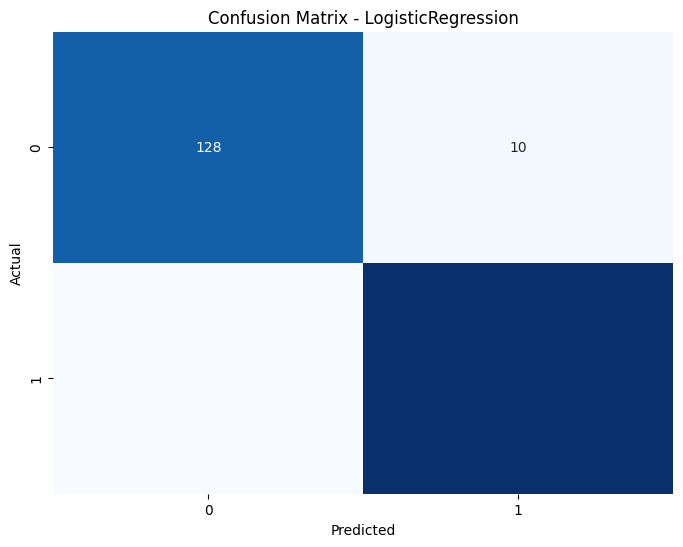

LogisticRegression:
Accuracy = 0.95
Precision = 0.94
Recall = 0.96



<Figure size 640x480 with 0 Axes>

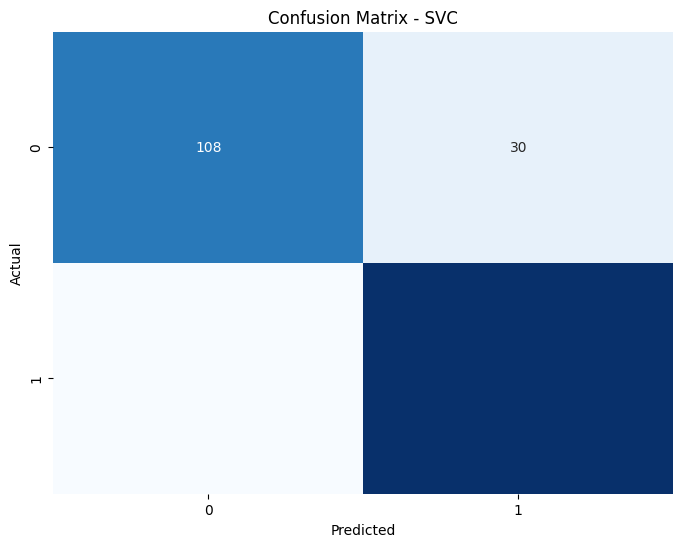

SVC:
Accuracy = 0.83
Precision = 0.83
Recall = 0.88



<Figure size 640x480 with 0 Axes>

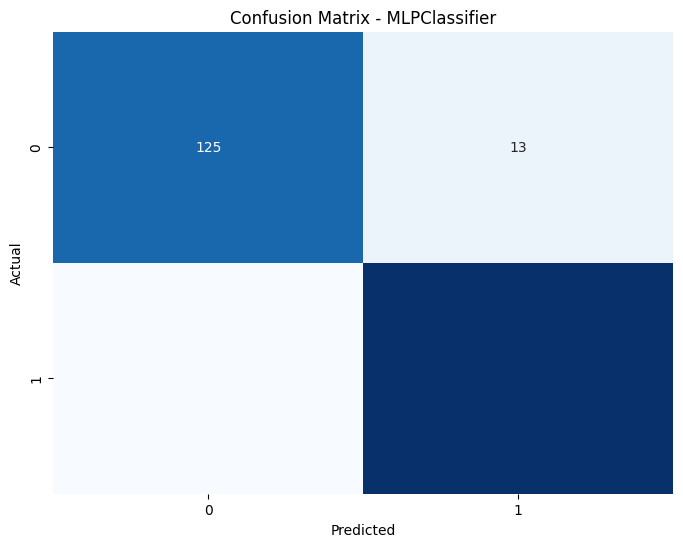

MLPClassifier:
Accuracy = 0.94
Precision = 0.92
Recall = 0.98



<Figure size 640x480 with 0 Axes>

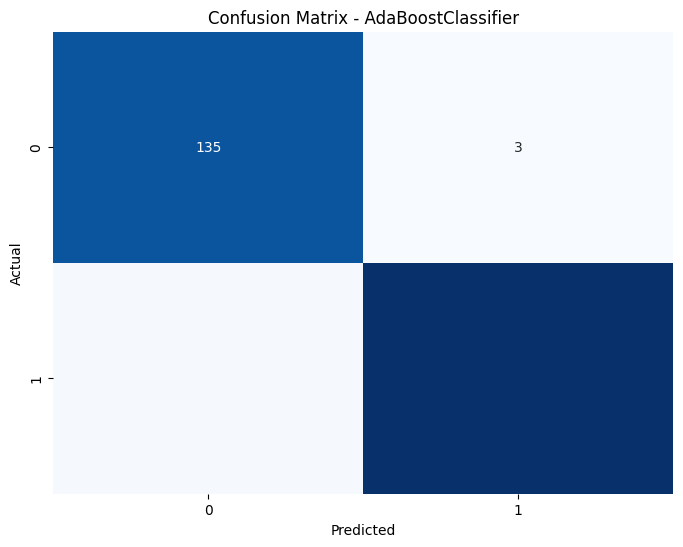

AdaBoostClassifier:
Accuracy = 0.97
Precision = 0.98
Recall = 0.97



<Figure size 640x480 with 0 Axes>

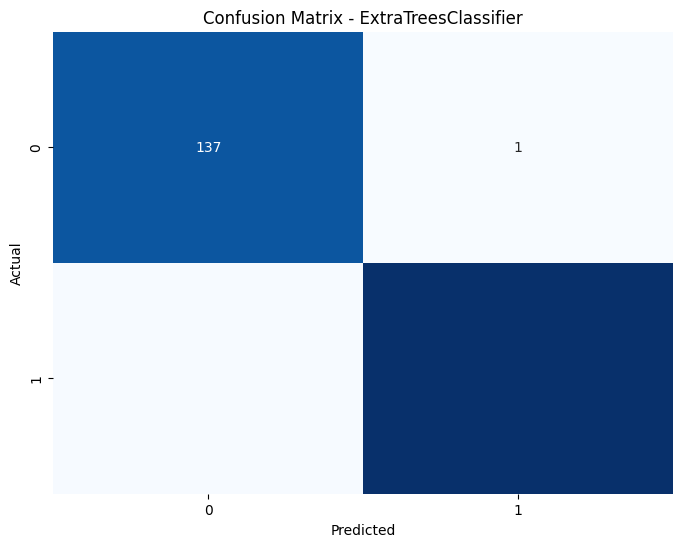

ExtraTreesClassifier:
Accuracy = 0.99
Precision = 0.99
Recall = 0.99



<Figure size 640x480 with 0 Axes>

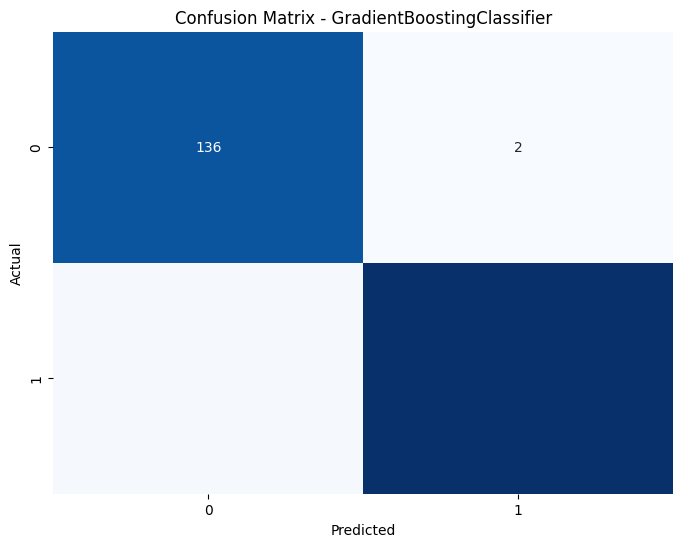

GradientBoostingClassifier:
Accuracy = 0.98
Precision = 0.99
Recall = 0.98



<Figure size 640x480 with 0 Axes>

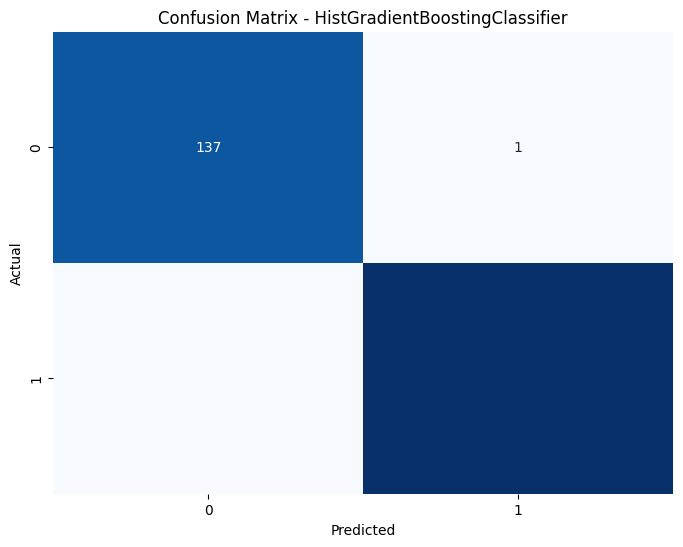

HistGradientBoostingClassifier:
Accuracy = 0.99
Precision = 0.99
Recall = 0.99



<Figure size 640x480 with 0 Axes>

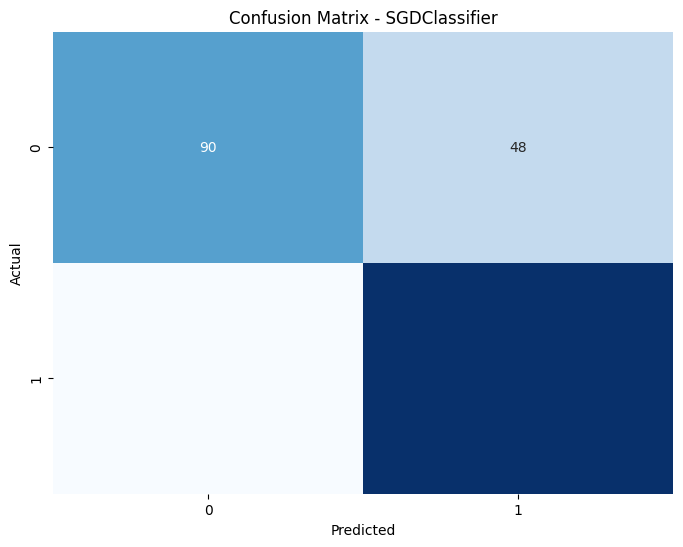

SGDClassifier:
Accuracy = 0.80
Precision = 0.76
Recall = 0.92



<Figure size 640x480 with 0 Axes>

In [65]:
model_list=[RandomForestClassifier(),
            LogisticRegression(),
            SVC(),
            MLPClassifier(),
            AdaBoostClassifier(),
            ExtraTreesClassifier(),
            GradientBoostingClassifier(),
            HistGradientBoostingClassifier(),
            SGDClassifier()
            ]

for i in model_list:
    model = i.fit(X_train, y_train)
    model_name = model.__class__.__name__
    y_pred = model.predict(X_test)
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    

    
    print(f"{model_name}:\nAccuracy = {accuracy:.2f}\nPrecision = {precision:.2f}\nRecall = {recall:.2f}\n")

# Evaluation 

Our goal is to optimize the early detection of cardiovascular pathologies. We need to select models that maximize precision and minimize costs.

### Best Models

- **ExtraTreesClassifier and HistGradientBoostingClassifier**
  - **Precision: 0.99**
  - **Recall: 0.99**
  - Stand out for their ability to minimize both false positives and false negatives to the utmost.

- **RandomForestClassifier**
  - **Precision: 0.99**
  - **Recall: 0.98**
  - Very effective too.

### Worst Models

These models are not recommended for this specific case:

- **SVC (Support Vector Classifier)**
  - **Precision: 0.83**
  - **Recall: 0.88**

- **SGDClassifier**
  - **Precision: 0.77**
  - **Recall: 0.93**

### Conclusion

For the early detection of cardiovascular pathologies where it is desired to avoid costly tests and diagnoses, models such as **ExtraTreesClassifier**, **HistGradientBoostingClassifier**, and **RandomForestClassifier** should be chosen due to their superior precision.
